<a href="https://colab.research.google.com/github/EnisZenuni/data_cleaning/blob/main/I2DS_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import missingno as ms

In [ ]:
df = pd.read_csv('/content/sample_data/user_behavior_data.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

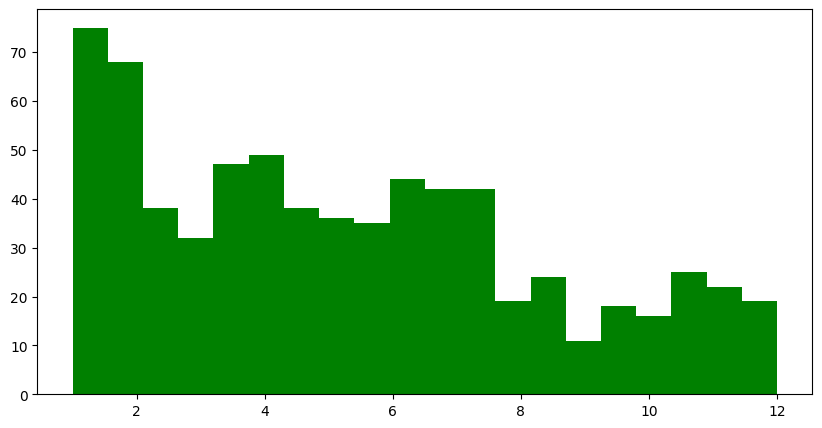

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df['Screen On Time (hours/day)'], bins = 20,color='green')
plt.show()

In [ ]:
# Group by Gender and calculate mean Age
df_age_mean = df.groupby('Gender')['Age'].mean()

# Convert Series to DataFrame
df_age_mean = df_age_mean.reset_index()

# Rename columns
df_age_mean = df_age_mean.rename(columns={'Gender': 'Gender_values', 'Age': 'Age_values'})

# Rename rows (index)
df_age_mean = df_age_mean.rename(index={0: 'value_0', 1: 'value_1'})

# Print the final DataFrame
print(df_age_mean)


        Gender_values  Age_values
value_0        Female   38.143750
value_1          Male   38.527536


In [ ]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,560.000000,665.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,942.332143,38.342857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,651.190675,12.038081,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,370.750000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,827.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1377.750000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2493.000000,59.000000,5.000000


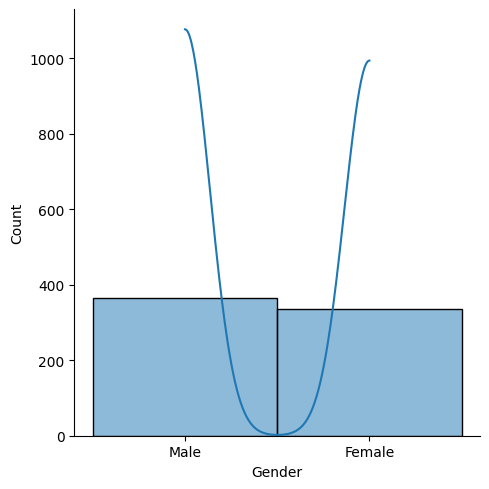

In [ ]:
sns.displot(df['Gender'],kde=True, bins = 20)
plt.show()

In [ ]:
df[['Gender','Age']]

,Gender,Age
0,Male,40.0
1,Female,47.0
2,Male,42.0
3,Male,20.0
4,Female,31.0
...,...,...
695,Male,22.0
696,Male,59.0
697,Female,50.0
698,Male,44.0


In [ ]:
isnullValues = df.isnull().sum();
isnullValues

,0
User ID,0
Device Model,0
Operating System,70
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),140
Age,35
Gender,0


In [ ]:
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.reset_index().rename(columns={'index':'column',0 : 'percentage'})
missing_percentage

,0
User ID,0.0
Device Model,0.0
Operating System,10.0
App Usage Time (min/day),0.0
Screen On Time (hours/day),0.0
Battery Drain (mAh/day),0.0
Number of Apps Installed,0.0
Data Usage (MB/day),20.0
Age,5.0
Gender,0.0


In [ ]:
import missingno as msno

<Axes: >

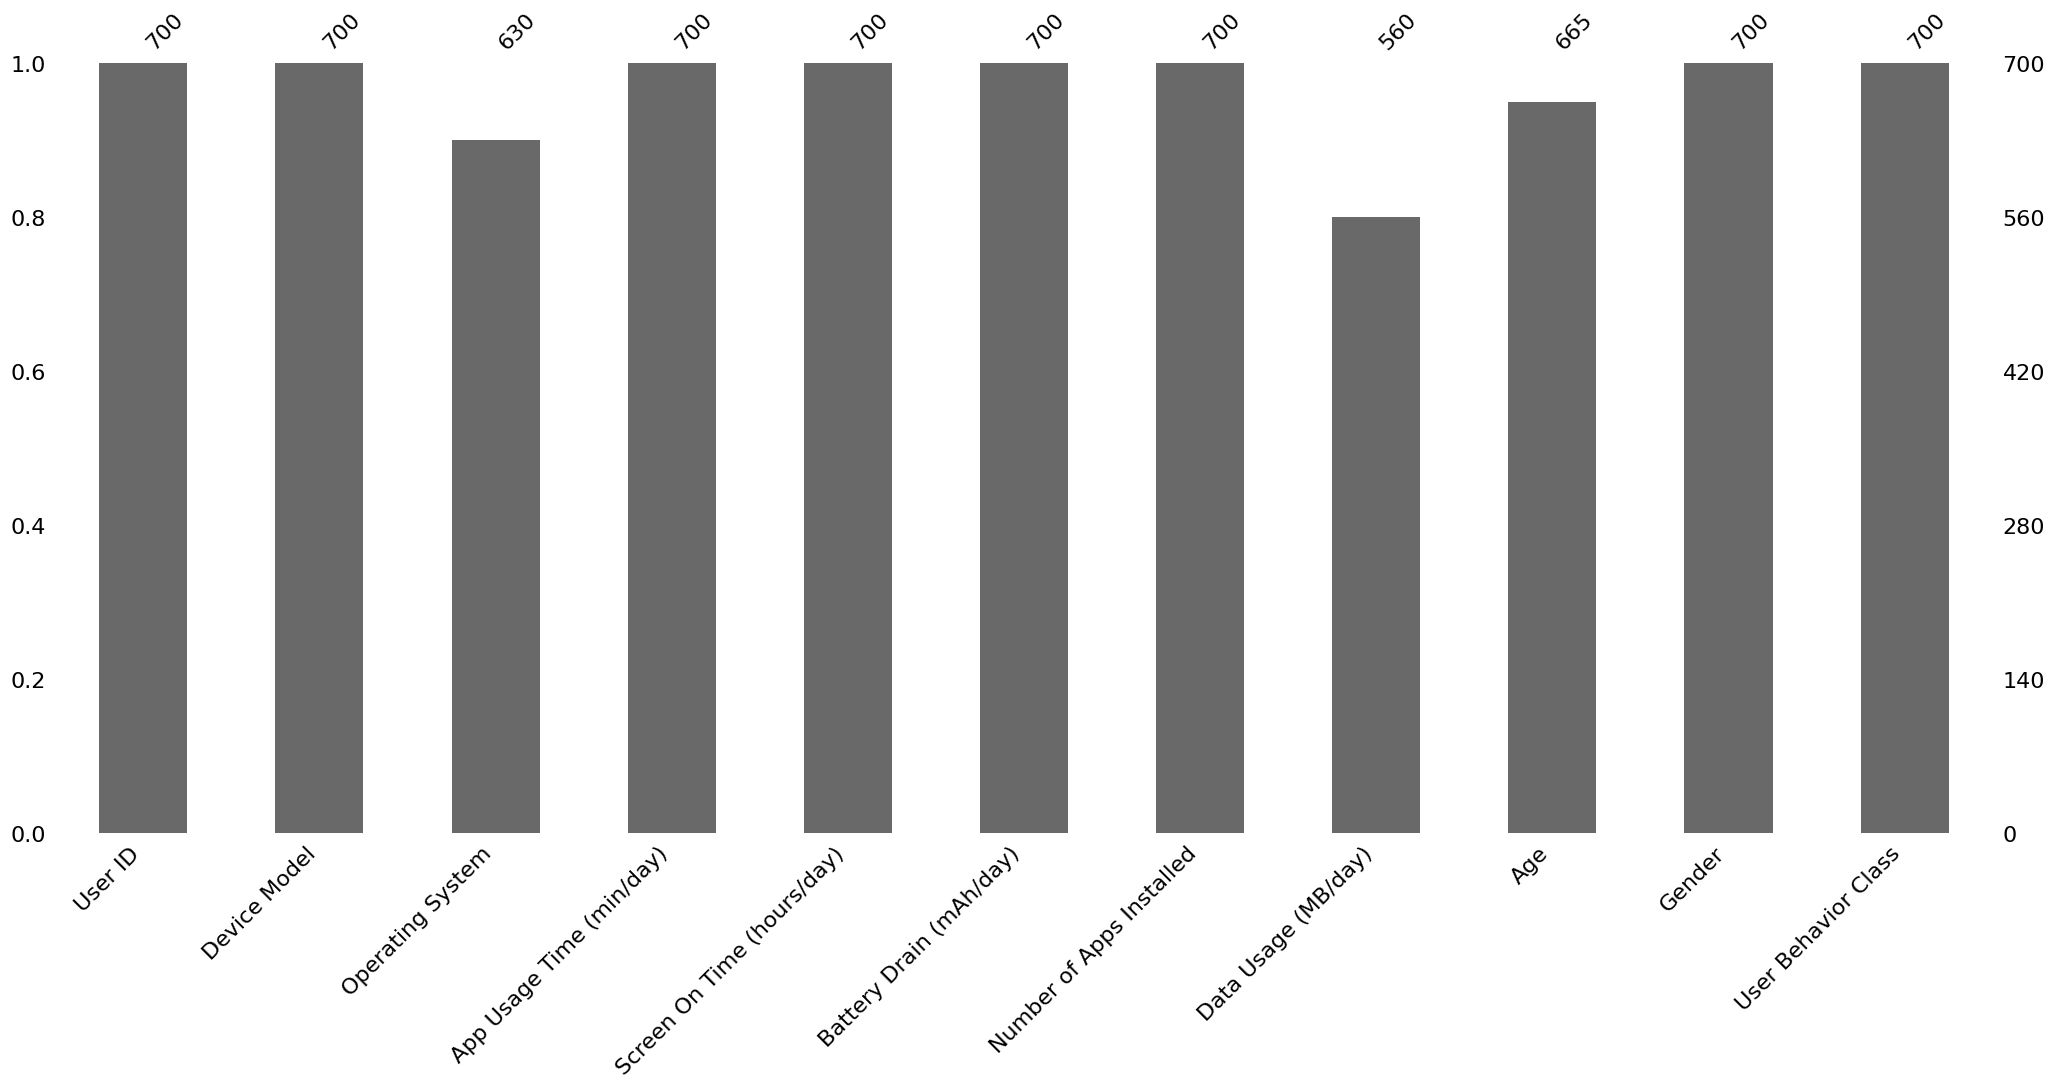

In [ ]:
msno.bar(df)

<Axes: >

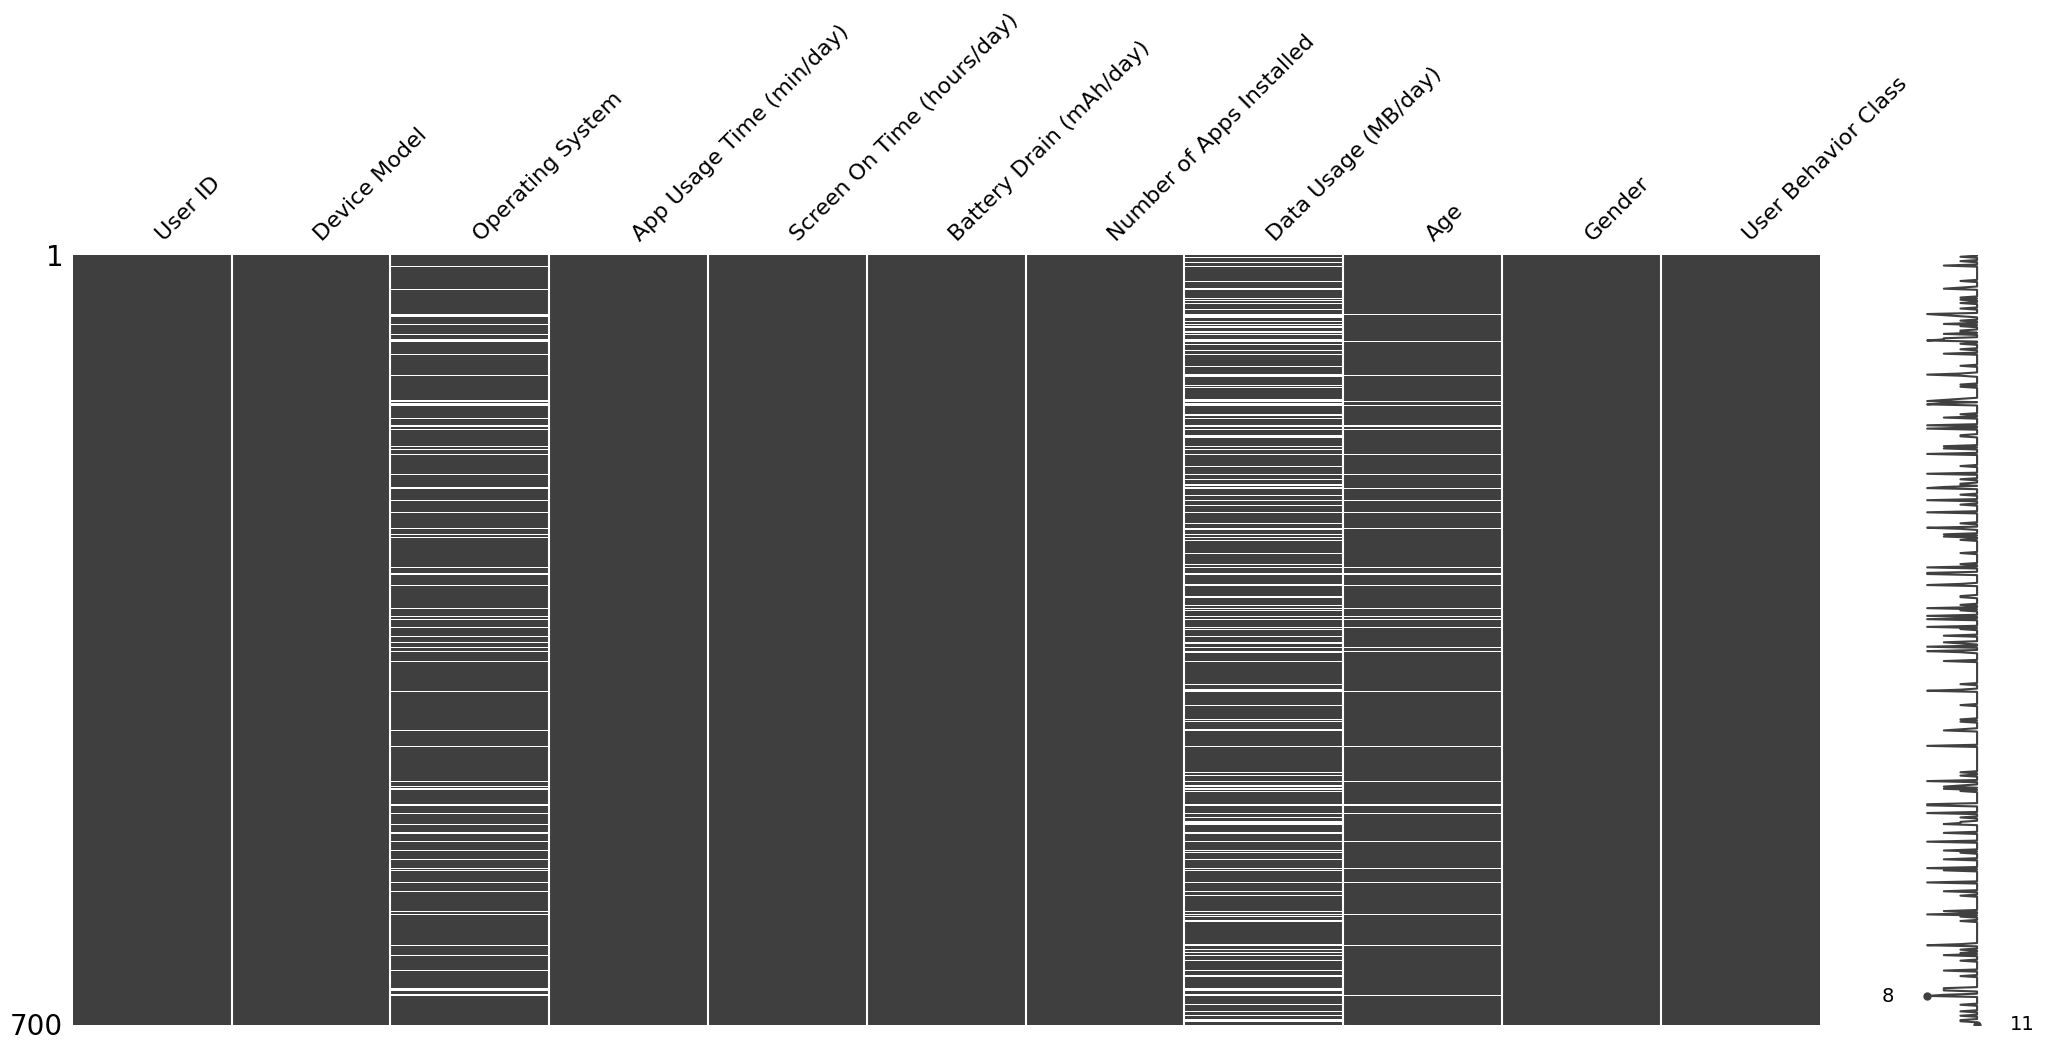

In [ ]:
msno.matrix(df)

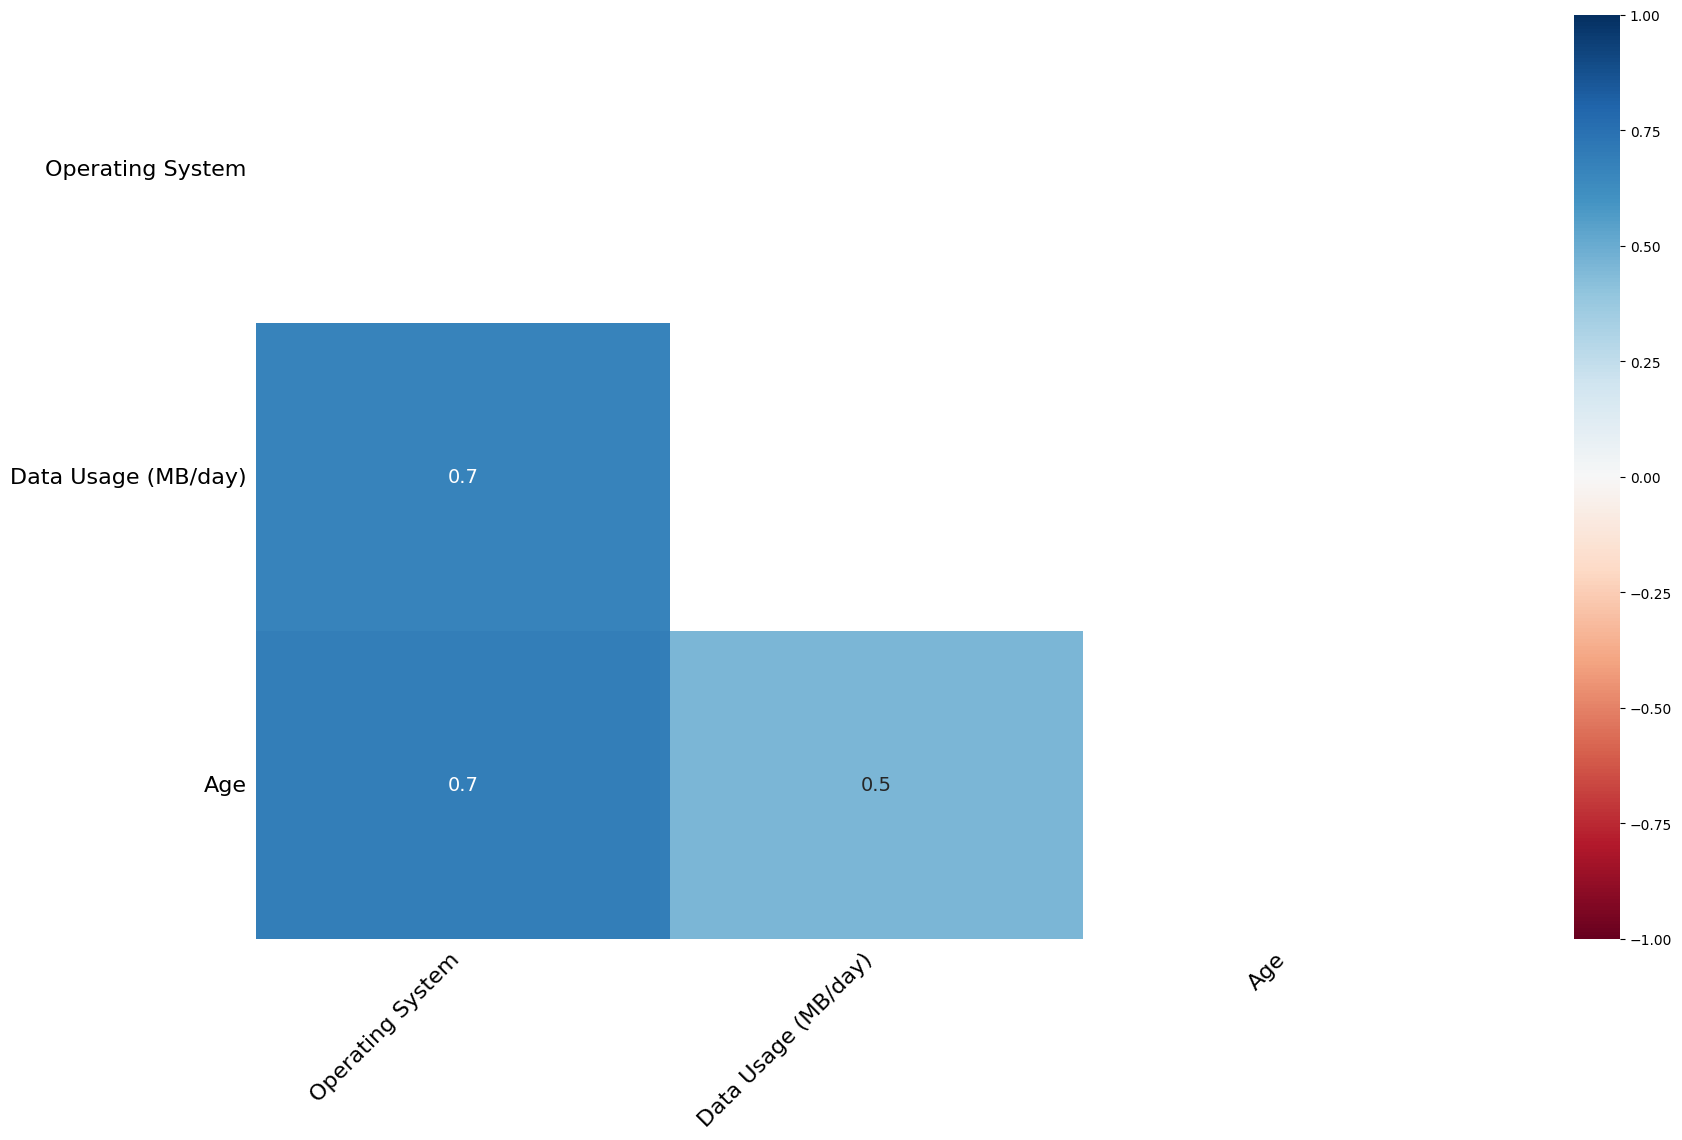

In [ ]:
msno.heatmap(df)
plt.show()

<Axes: >

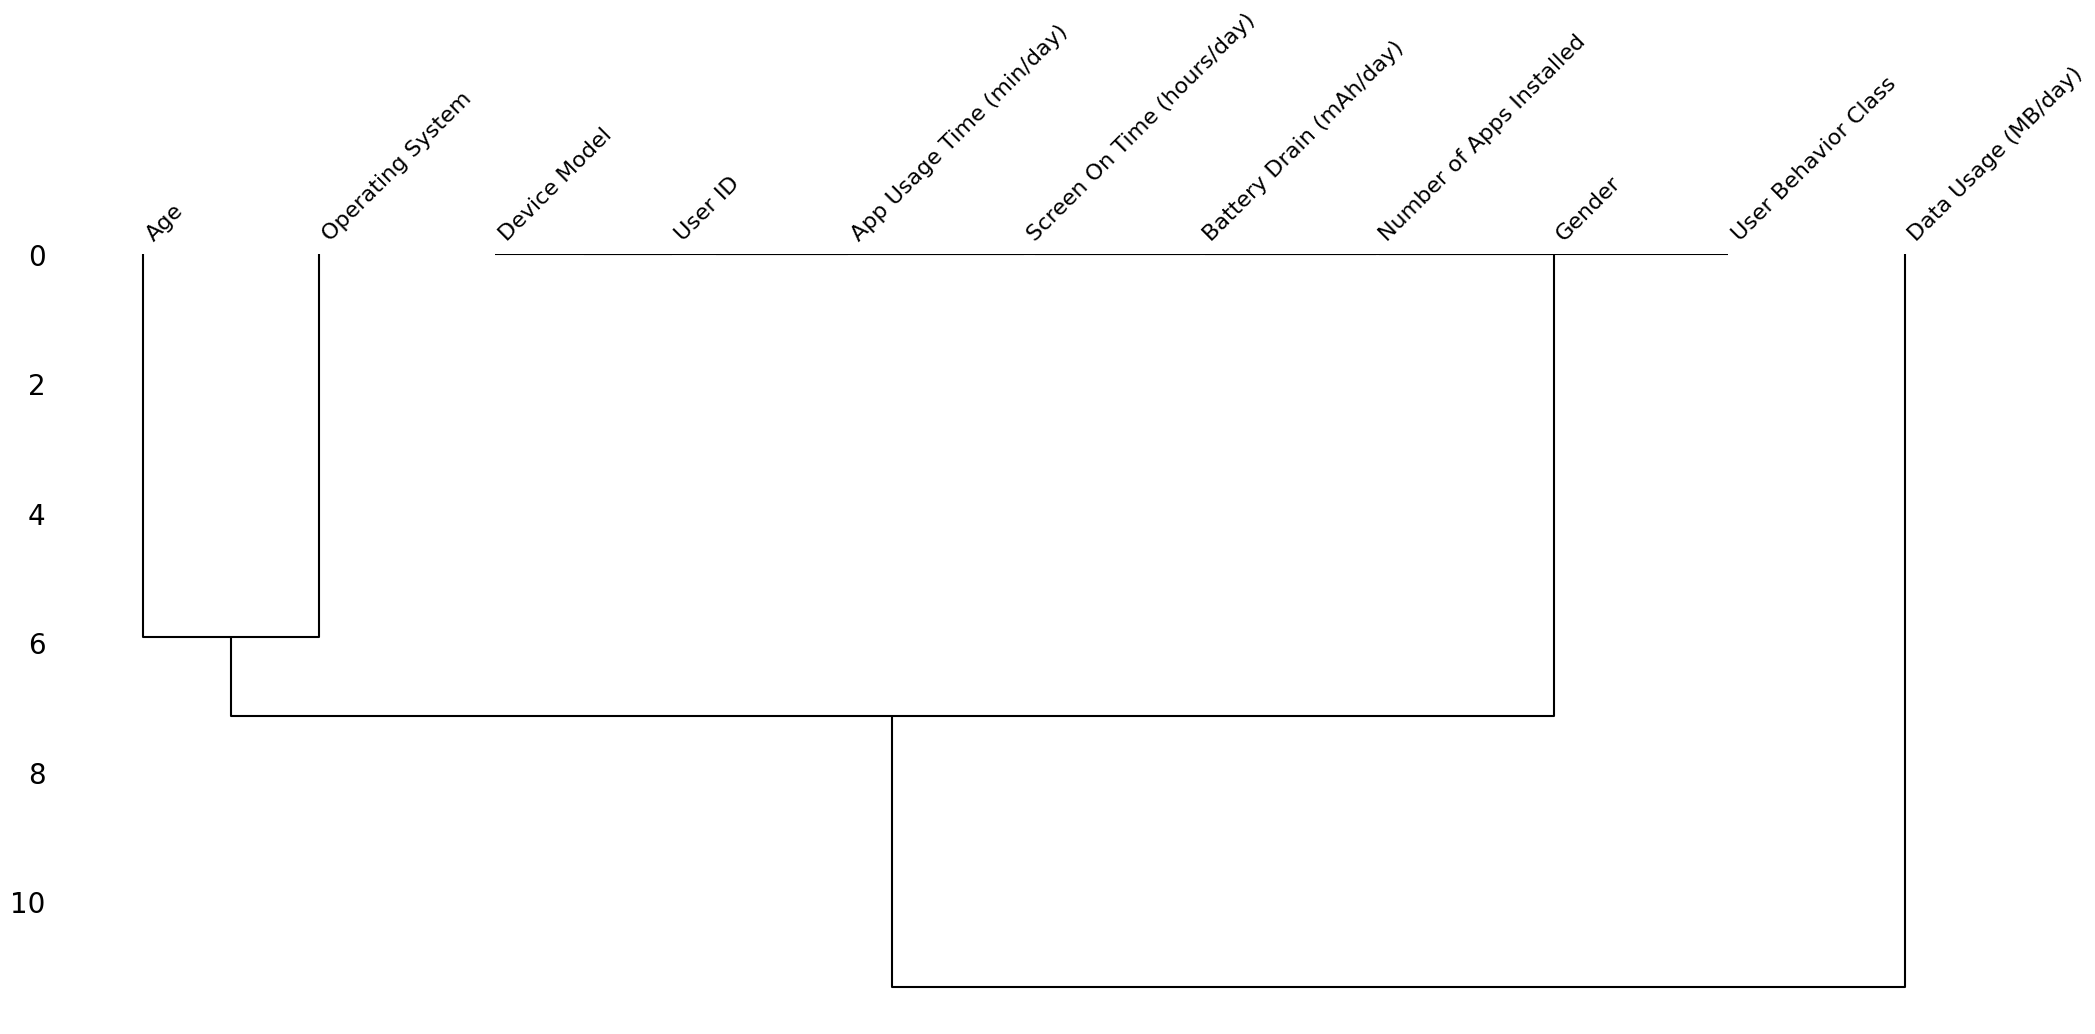

In [ ]:
msno.dendrogram(df)

In [ ]:
df = df.dropna(subset='Operating System',axis = 0)
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),70
Age,0
Gender,0


In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
df['Data Usage (MB/day)'] = pd.to_numeric(df['Data Usage (MB/day)'], errors='coerce')

In [ ]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df['Data Usage (MB/day)'] = imputer.fit_transform(df[['Data Usage (MB/day)']])

<Axes: >

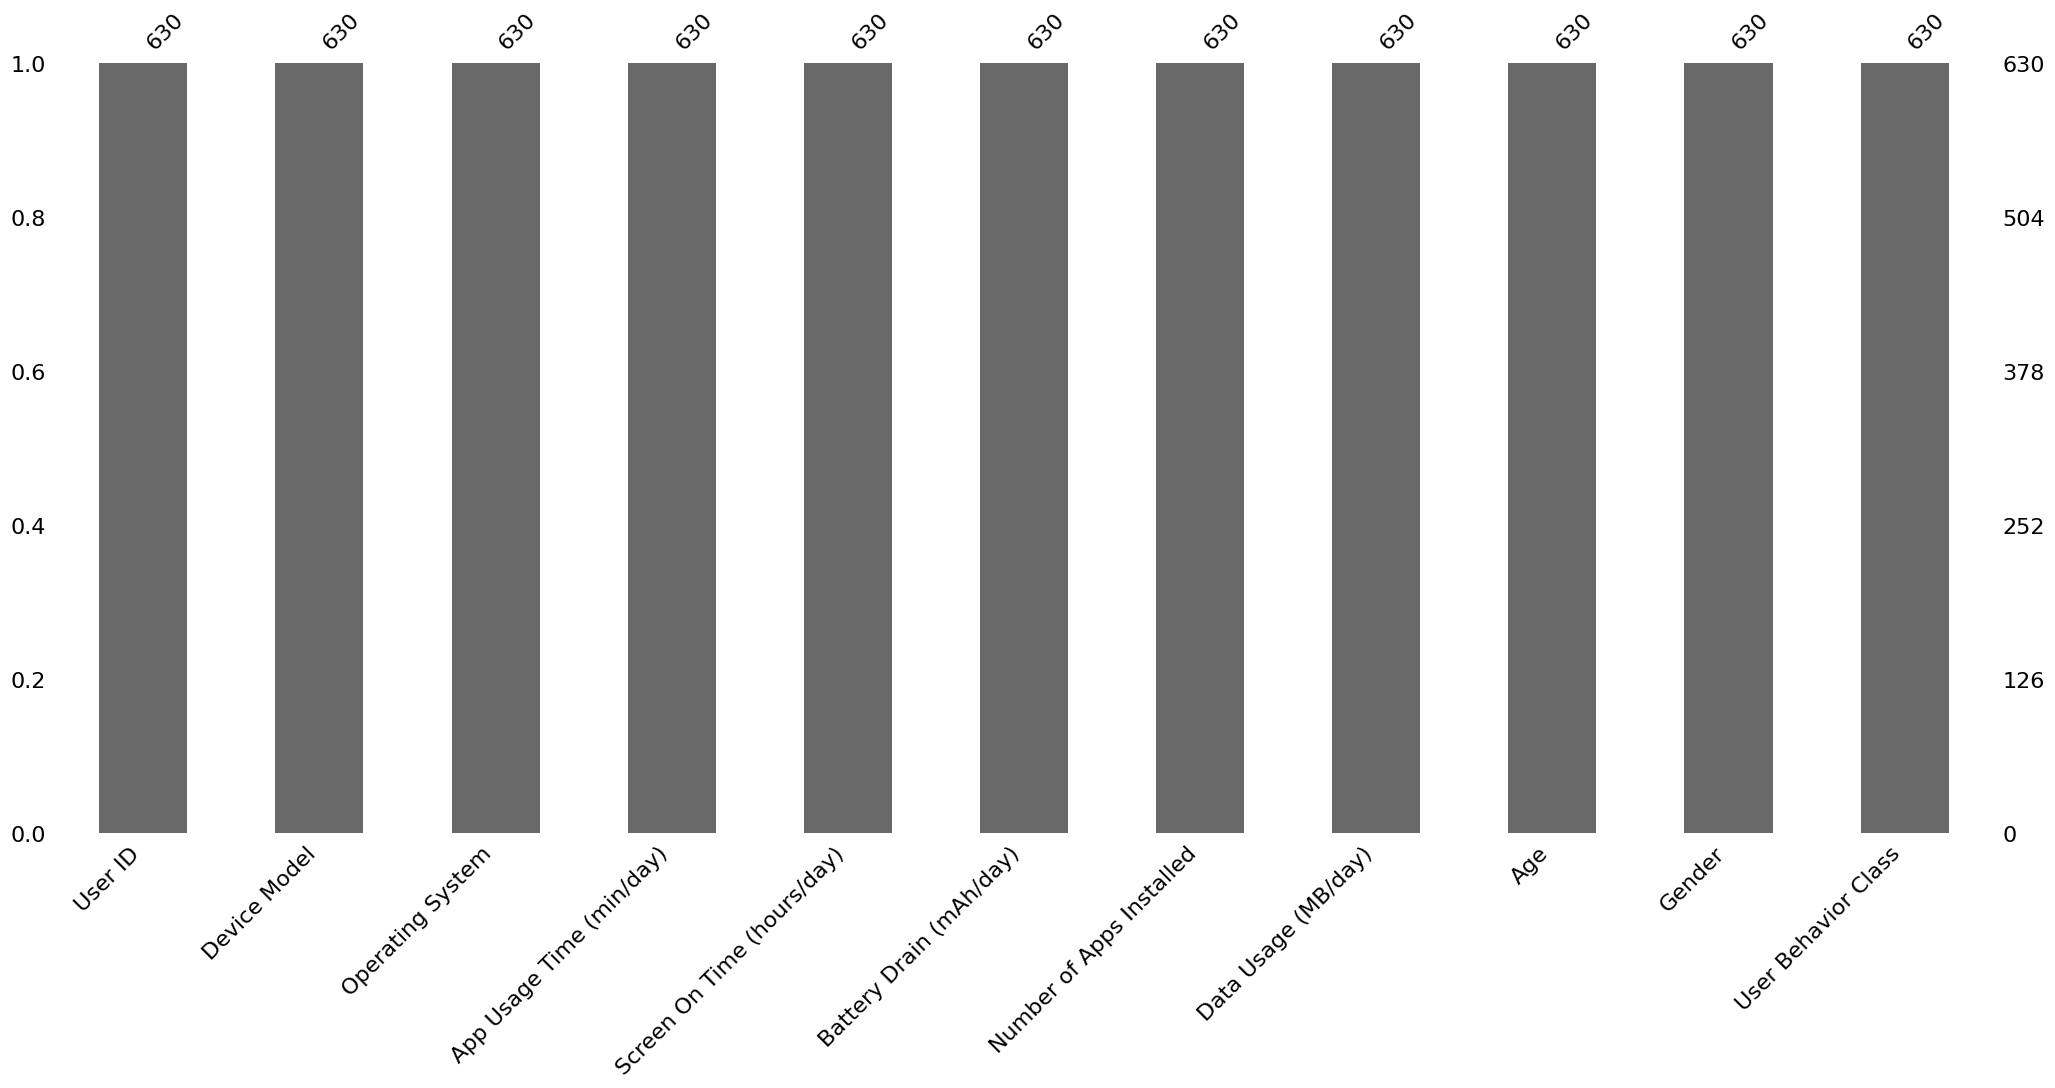

In [ ]:
ms.bar(df)

<Axes: xlabel='Operating System'>

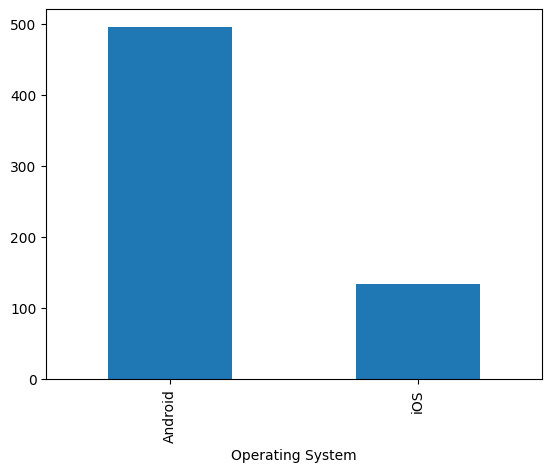

In [ ]:
df['Operating System'].value_counts().plot.bar() # Use this to check for most frequent values

In [ ]:
print(df.isnull().sum())

User ID                             0
Operating System                    0
App Usage Time (min/day)            0
Screen On Time (hours/day)          0
Battery Drain (mAh/day)             0
Number of Apps Installed            0
Data Usage (MB/day)                 0
Age                                35
Gender                              0
User Behavior Class                 0
Device Model_Google Pixel 5         0
Device Model_OnePlus 9              0
Device Model_Samsung Galaxy S21     0
Device Model_Xiaomi Mi 11           0
Device Model_iPhone 12              0
dtype: int64


In [ ]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,351.312698,273.439683,5.304444,1537.585714,51.119048,942.332143,38.466667,3.012698
std,202.446740,177.873444,3.040983,816.110101,27.033574,613.887449,11.976049,1.397191
min,1.000000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,178.250000,111.750000,2.625000,735.250000,26.250000,417.500000,28.000000,2.000000
50%,354.500000,230.500000,5.000000,1522.000000,50.000000,942.332143,38.000000,3.000000
75%,524.750000,436.750000,7.400000,2240.000000,75.000000,1300.750000,49.000000,4.000000
max,700.000000,598.000000,12.000000,2993.000000,99.000000,2493.000000,59.000000,5.000000


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
df[['Age']] = knn_imputer.fit_transform(df[['Age']])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
ohe_transform = ohe.fit_transform(df[['Device Model']])
df = pd.concat([df, ohe_transform], axis=1).drop(columns=['Device Model'])

Always use sparse_out = False
Always use .set_output(transform='pandas') **bold text**

In [ ]:
df.head()

,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
0,1,Android,393,6.4,1872,67,1122.000000,40.0,Male,4,1.0,0.0,0.0,0.0,0.0
1,2,Android,268,4.7,1331,42,944.000000,47.0,Female,3,0.0,1.0,0.0,0.0,0.0
2,3,Android,154,4.0,761,32,942.332143,42.0,Male,2,0.0,0.0,0.0,1.0,0.0
3,4,Android,239,4.8,1676,56,871.000000,20.0,Male,3,1.0,0.0,0.0,0.0,0.0
4,5,iOS,187,4.3,1367,58,988.000000,31.0,Female,3,0.0,0.0,0.0,0.0,1.0


In [ ]:
df['Operating System'].unique()

array(['Android', 'iOS', nan], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit_transform(df['Operating System'])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1,
       1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2,

In [ ]:
df['Operating System'] = label_encoder.fit_transform(df['Operating System'])
df.head()

,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
0,1,0,393,6.4,1872,67,1122.000000,40.0,Male,4,1.0,0.0,0.0,0.0,0.0
1,2,0,268,4.7,1331,42,944.000000,47.0,Female,3,0.0,1.0,0.0,0.0,0.0
2,3,0,154,4.0,761,32,942.332143,42.0,Male,2,0.0,0.0,0.0,1.0,0.0
3,4,0,239,4.8,1676,56,871.000000,20.0,Male,3,1.0,0.0,0.0,0.0,0.0
4,5,1,187,4.3,1367,58,988.000000,31.0,Female,3,0.0,0.0,0.0,0.0,1.0


In [ ]:
df['Operating System'].value_counts()

,count
Operating System,
0,496
1,134


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,364
Female,336


In [ ]:
label_encoder = LabelEncoder()

<Axes: xlabel='Gender'>

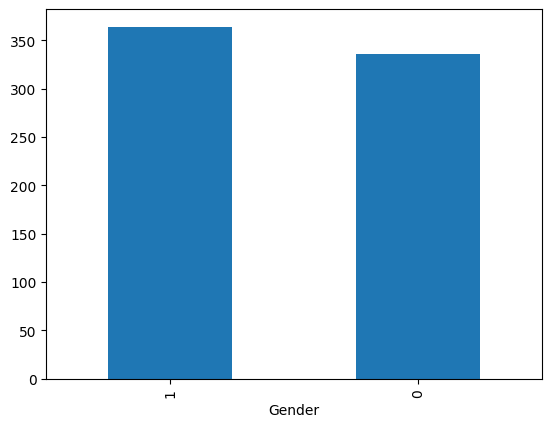

In [ ]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Gender'].value_counts().plot.bar()

In [ ]:
df.head()

,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
0,1,0,393,6.4,1872,67,1122.000000,40.0,1,4,1.0,0.0,0.0,0.0,0.0
1,2,0,268,4.7,1331,42,944.000000,47.0,0,3,0.0,1.0,0.0,0.0,0.0
2,3,0,154,4.0,761,32,942.332143,42.0,1,2,0.0,0.0,0.0,1.0,0.0
3,4,0,239,4.8,1676,56,871.000000,20.0,1,3,1.0,0.0,0.0,0.0,0.0
4,5,1,187,4.3,1367,58,988.000000,31.0,0,3,0.0,0.0,0.0,0.0,1.0




1.   Upload the neccessary libraries (Pandas, Missigno, scktlearn, Imputer and so)
2.   Check for null values
3.   If the null values are less than 10% feel free to drop the column



4.If values missing are more than 10%, use imputing or KNN to predict the values, use missigno before hand to check which columns have missing values or use the percent of missing values to get a better view

5. Try to remove or replace string data with numbers. Use Label Encoding for nominal data(M,F), OrdinalEncoding for ordinal data(Small, Medium, Large) and use OneHotEncoder if we have around 5 types of data(Ordinal, Categorical data)

           **SPLIT THE DATA SET AND THEN NORMALIZE OR STANDARDIZE**

6. After transofrming the data to numbers. Now we standardize or Normalize the data (Feature Scaling) which helps improve the models and performance by transofrming the data in the same scale. Normalization allows you to have numbers from 0 to 1. Standarization has a mean of 0 and standard deviation of 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          700 non-null    int64  
 1   Operating System                 700 non-null    int64  
 2   App Usage Time (min/day)         700 non-null    int64  
 3   Screen On Time (hours/day)       700 non-null    float64
 4   Battery Drain (mAh/day)          700 non-null    int64  
 5   Number of Apps Installed         700 non-null    int64  
 6   Data Usage (MB/day)              700 non-null    float64
 7   Age                              665 non-null    float64
 8   Gender                           700 non-null    int64  
 9   User Behavior Class              700 non-null    int64  
 10  Device Model_Google Pixel 5      700 non-null    float64
 11  Device Model_OnePlus 9           700 non-null    float64
 12  Device Model_Samsung G

In [ ]:
df.describe().round(3)

,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
count,630.000,630.000,630.000,630.000,630.000,630.000,630.000,630.000,630.000,630.000,630.000,630.000,630.000,630.000,630.000
mean,351.313,0.213,273.440,5.304,1537.586,51.119,942.332,38.467,0.516,3.013,0.202,0.192,0.189,0.205,0.213
std,202.447,0.410,177.873,3.041,816.110,27.034,613.887,11.976,0.500,1.397,0.402,0.394,0.392,0.404,0.410
min,1.000,0.000,30.000,1.000,302.000,10.000,102.000,18.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,178.250,0.000,111.750,2.625,735.250,26.250,417.500,28.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000
50%,354.500,0.000,230.500,5.000,1522.000,50.000,942.332,38.000,1.000,3.000,0.000,0.000,0.000,0.000,0.000
75%,524.750,0.000,436.750,7.400,2240.000,75.000,1300.750,49.000,1.000,4.000,0.000,0.000,0.000,0.000,0.000
max,700.000,1.000,598.000,12.000,2993.000,99.000,2493.000,59.000,1.000,5.000,1.000,1.000,1.000,1.000,1.000


The data is all over the place, the diffference in mean is huge thats why we need to standardize it or normalize it 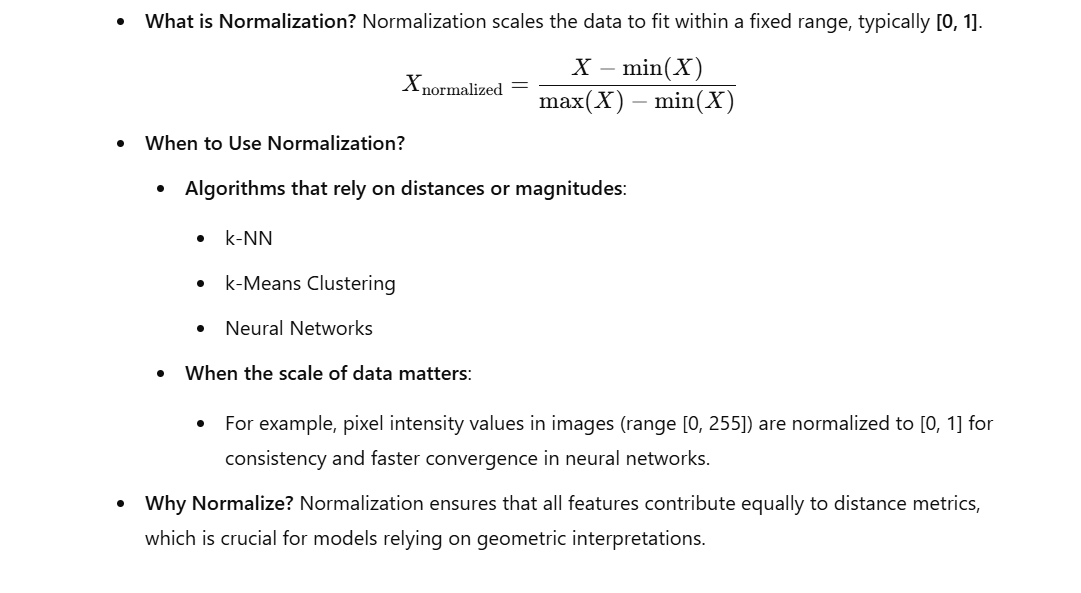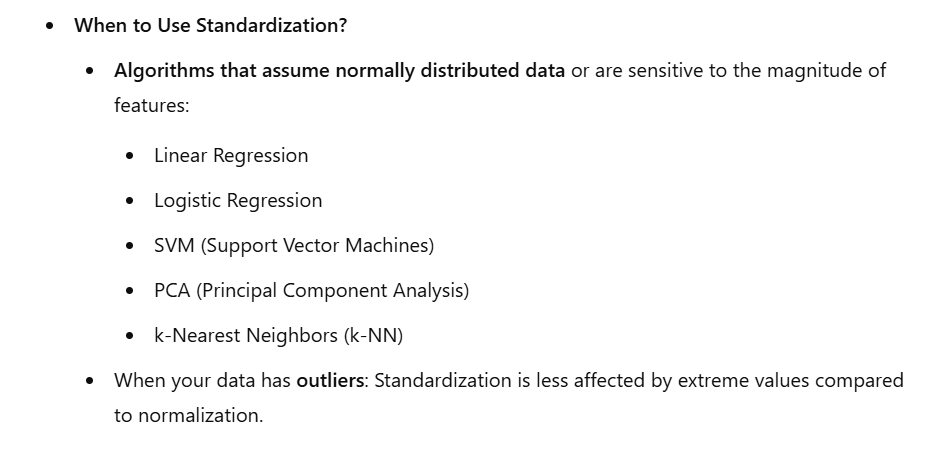


Split the data in a 80/20 fashion and then normalize or standardize

In [ ]:
from  sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['Screen On Time (hours/day)'])
y = df['Screen On Time (hours/day)']
# Remove the prediction column from X, have the prediction column in y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [ ]:
X_train.describe()

,User ID,Operating System,App Usage Time (min/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,355.898214,0.207143,273.451786,1533.035714,51.123214,942.332143,38.160714,0.517857,3.005357,0.217857,0.182143,0.191071,0.201786,0.207143
std,200.168789,0.405621,179.925361,826.620782,27.349474,651.190675,11.943182,0.500128,1.413571,0.413159,0.386307,0.393497,0.401692,0.405621
min,1.000000,0.000000,30.000000,302.000000,10.000000,102.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,185.750000,0.000000,106.000000,695.250000,26.000000,370.750000,28.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,364.500000,0.000000,230.500000,1525.500000,49.000000,827.500000,37.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,529.250000,0.000000,444.000000,2271.000000,75.000000,1377.750000,49.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,700.000000,1.000000,598.000000,2984.000000,99.000000,2493.000000,59.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

Always use fit_transform on trainintg data and just transform on test data



In [ ]:
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

Always fit training data in linear regression, We are using linear regression because we are tryin to predict a continous variable if we try to predit simple data such as 1 or 0, spam  not spam we can use logistic regression

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

Use score to check your model accuracy or use sk learn metric library

In [ ]:
lr.score(X_test, y_test)

0.8734682397032765

In [ ]:
y_pred = lr.predict(X_test) #always use this we predict our y pred from our x_test


[6.73996282 2.00905487 2.06441329 3.59163442 5.18710389 3.54326881
 3.45751804 2.07923066 6.93596101 5.19184991 1.94635249 2.13303819
 3.52262107 2.11000649 5.03918812 6.96600572 8.65616465 1.92773247
 5.05870707 3.53615463 8.5124911  6.64656979 5.06514666 7.06256084
 6.83356291 3.56016738 5.2447089  8.53391015 3.61894577 8.57648166
 2.11283691 4.9391515  2.09551298 5.16131009 7.05575138 8.60208108
 8.7352503  2.12834106 1.94429729 3.69252138 5.1306868  6.9651315
 1.94867505 5.25393994 3.62208392 8.33217745 5.11423353 4.90185151
 2.09354297 5.29167718 3.75010825 3.47610474 3.47515437 1.97317561
 8.51595277 8.51583704 5.29200192 1.96739447 6.98519834 3.49873249
 4.97795743 3.53090823 2.04878577 3.52392501 8.6721551  3.58040086
 8.36377407 1.98780205 8.6462483  8.42779276 2.10954237 3.66664331
 4.95229991 3.70660654 5.23568257 3.36018658 8.7981792  7.08636885
 7.01393287 6.75240098 3.51105485 2.06011074 7.05236022 5.40833861
 6.8304014  6.86923584 8.5582794  5.14934874 5.24022974 2.11122

In [ ]:
lr.score(X_test, y_test)

0.8734682397032765

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
#Use this for categorial/data discrete label for algorithms such as

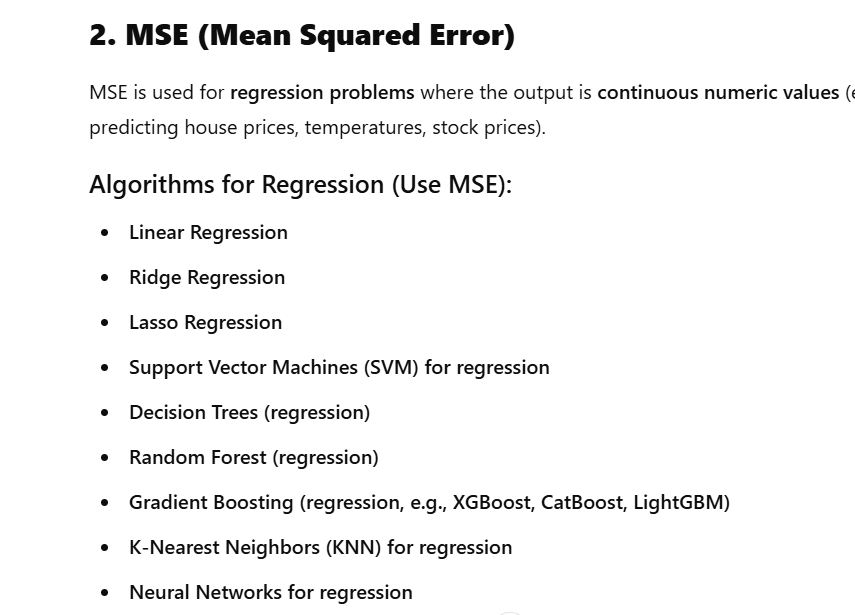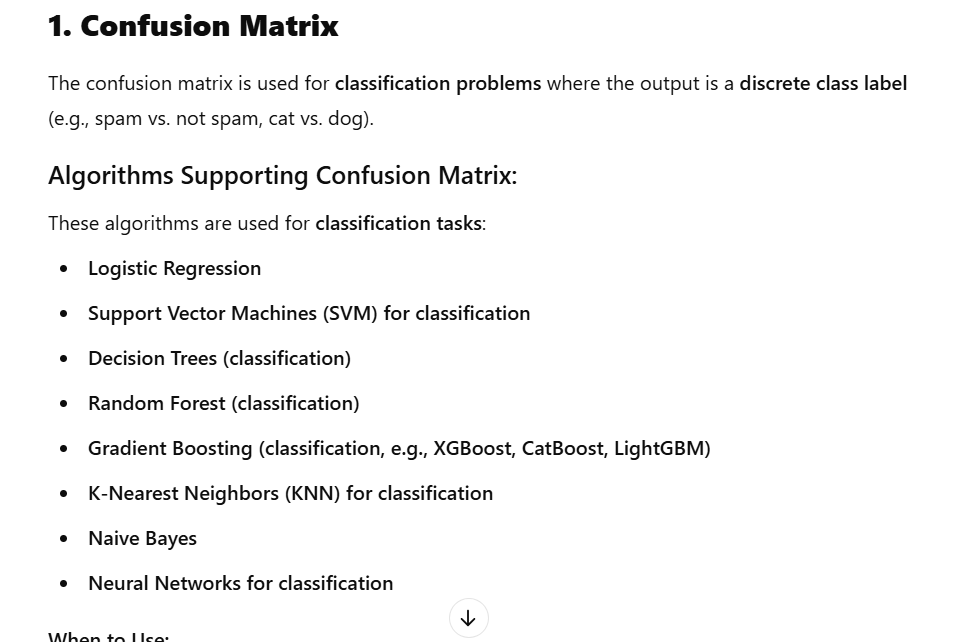

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(mse)

1.1352969230513907


In [ ]:
mean_absolute_error(y_test, y_pred)

0.7885958356410651

In [ ]:
lr.coef_

array([-4.87655230e-05, -3.72639318e-02,  2.49256104e-03,  1.97835290e-04,
       -1.47993571e-03,  1.07131126e-03,  6.33955580e-03,  8.45661176e-03,
        1.24995284e+00, -2.61906795e-02,  2.99757683e-02,  4.42896425e-02,
       -1.08107995e-02, -3.72639318e-02])

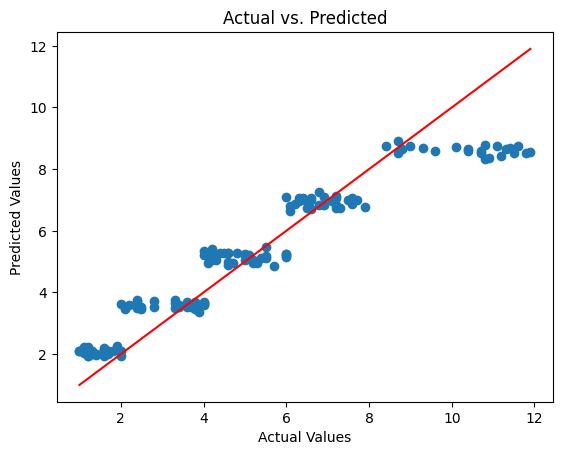

In [ ]:
import matplotlib.pyplot as plt

# For regression
import numpy as np


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

We use a visaulization to see if our model is correct

In [ ]:
df['Predicted_Values'] = lr.predict(X)
# Store the lr.predict(X) values in a new column in the df
df.round(3)

,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Predicted_Values
0,1,0,393,6.4,1872,67,1122.000,40.0,1,4,1.0,0.0,0.0,0.0,0.0,7.095
1,2,0,268,4.7,1331,42,944.000,47.0,0,3,0.0,1.0,0.0,0.0,0.0,5.365
2,3,0,154,4.0,761,32,942.332,42.0,1,2,0.0,0.0,0.0,1.0,0.0,3.667
3,4,0,239,4.8,1676,56,871.000,20.0,1,3,1.0,0.0,0.0,0.0,0.0,5.043
4,5,1,187,4.3,1367,58,988.000,31.0,0,3,0.0,0.0,0.0,0.0,1.0,4.987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,1,92,3.9,1082,26,942.332,22.0,1,2,0.0,0.0,0.0,0.0,1.0,3.360
696,697,0,316,6.8,1965,68,942.332,59.0,1,4,0.0,0.0,0.0,1.0,0.0,6.829
697,698,0,99,3.1,942,22,457.000,50.0,0,2,1.0,0.0,0.0,0.0,0.0,3.053
698,699,0,62,1.7,431,13,224.000,44.0,1,1,0.0,0.0,1.0,0.0,0.0,1.414


In [ ]:
standard_scaler = StandardScaler()
df_copy = df.copy()
standardized_data = standard_scaler.fit_transform(df_copy)
standardized_df = pd.DataFrame(standardized_data, columns=df_copy.columns)
standardized_df.describe()

,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
0,-1.731769,-0.519770,0.672699,0.360550,0.410092,0.587920,0.292905,0.128135,0.968742,0.707195,1.990133,-0.487566,-0.482573,-0.507430,-0.519770
1,-1.726826,-0.519770,-0.030606,-0.198924,-0.253336,-0.337591,0.002719,0.713099,-1.032266,-0.009096,-0.502479,2.051003,-0.482573,-0.507430,-0.519770
2,-1.721882,-0.519770,-0.672020,-0.429296,-0.952326,-0.707795,0.000000,0.295268,0.968742,-0.725386,-0.502479,-0.487566,-0.482573,1.970716,-0.519770
3,-1.716939,-0.519770,-0.193773,-0.166014,0.169737,0.180695,-0.116290,-1.543192,0.968742,-0.009096,1.990133,-0.487566,-0.482573,-0.507430,-0.519770
4,-1.711995,1.923926,-0.486348,-0.330565,-0.209189,0.254736,0.074450,-0.623962,-1.032266,-0.009096,-0.502479,-0.487566,-0.482573,-0.507430,1.923926


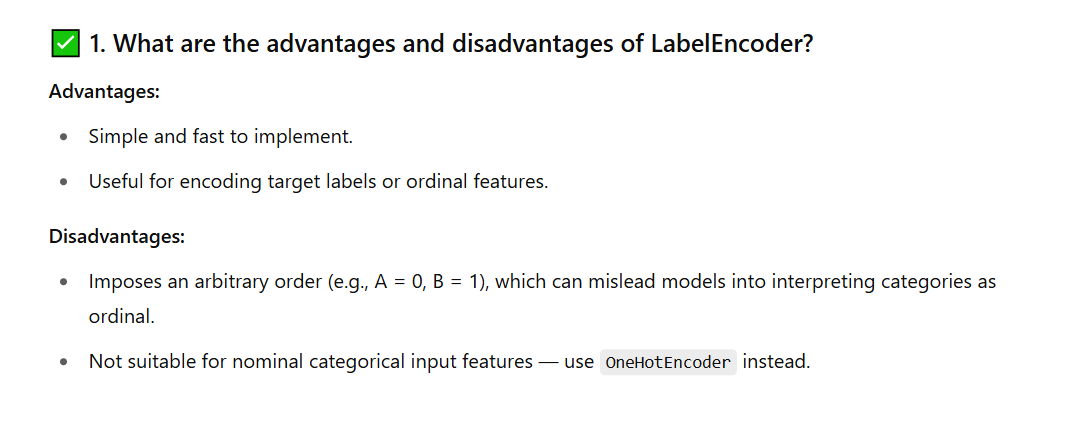

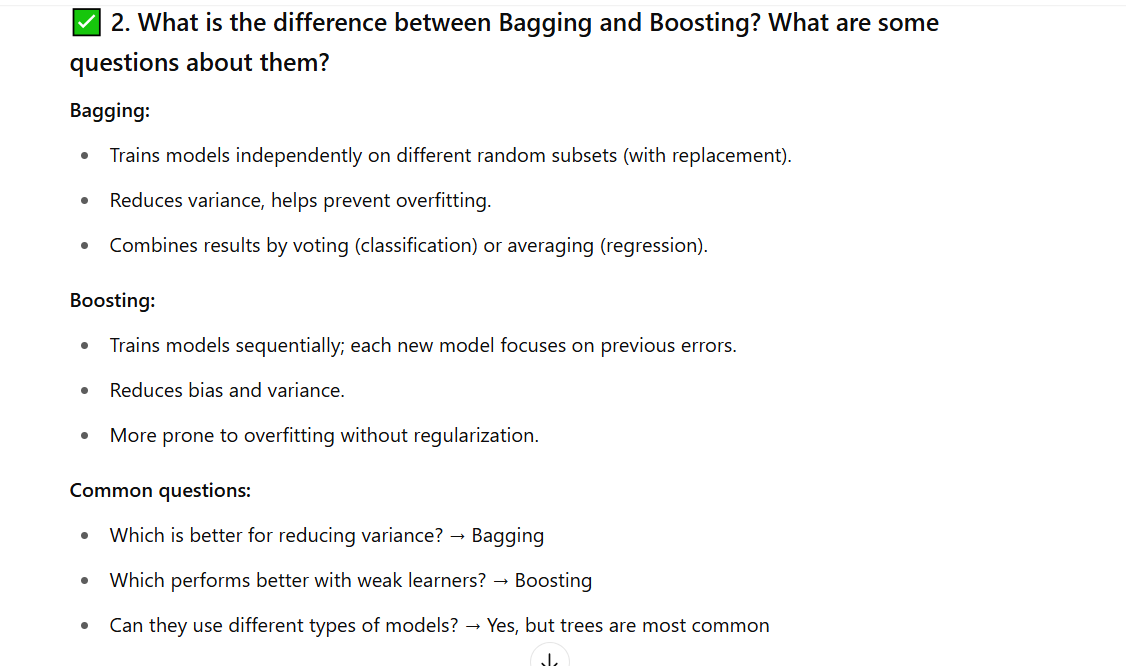

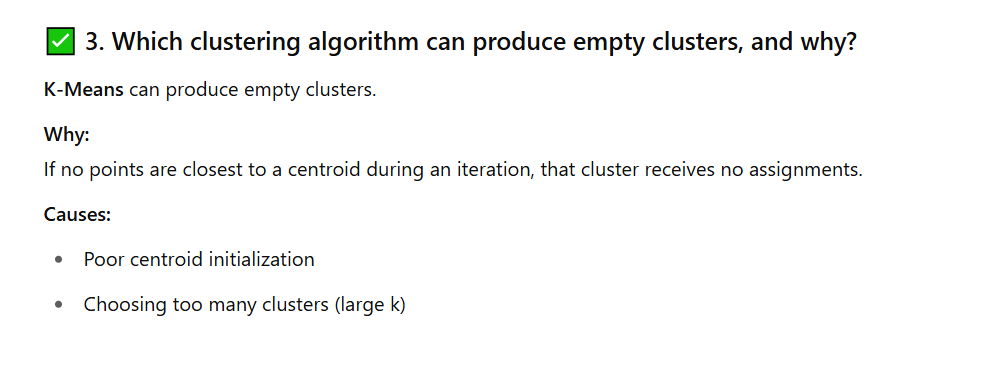

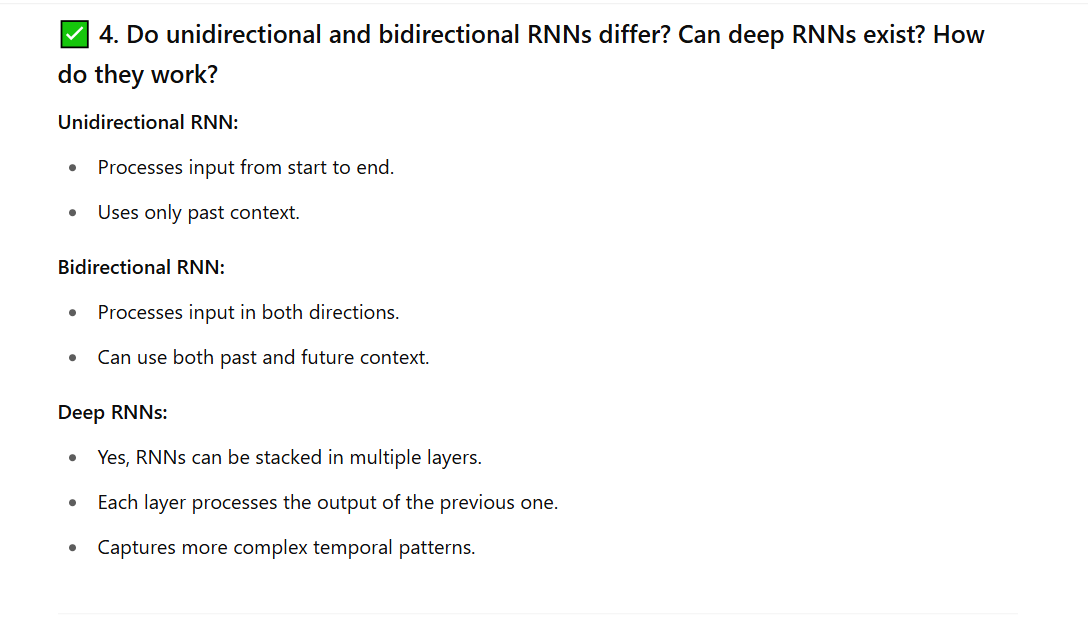

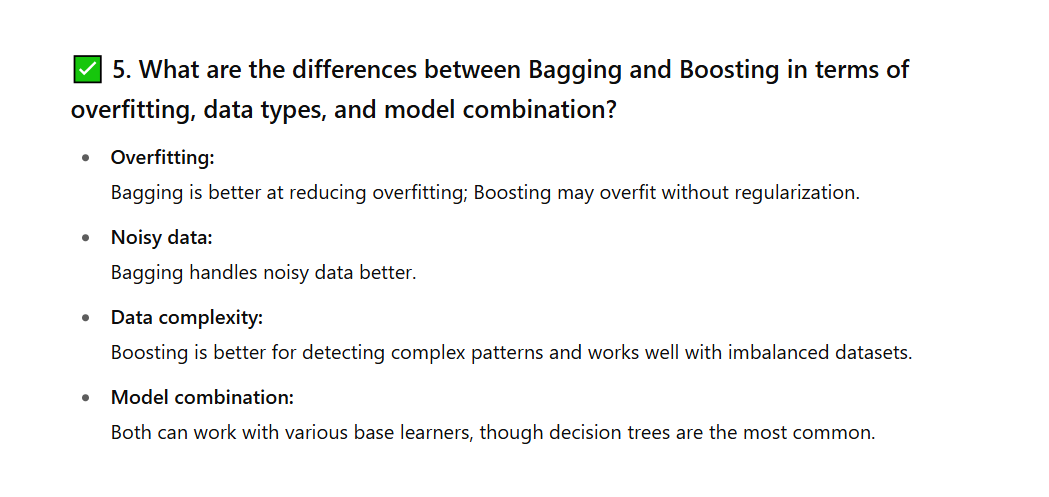

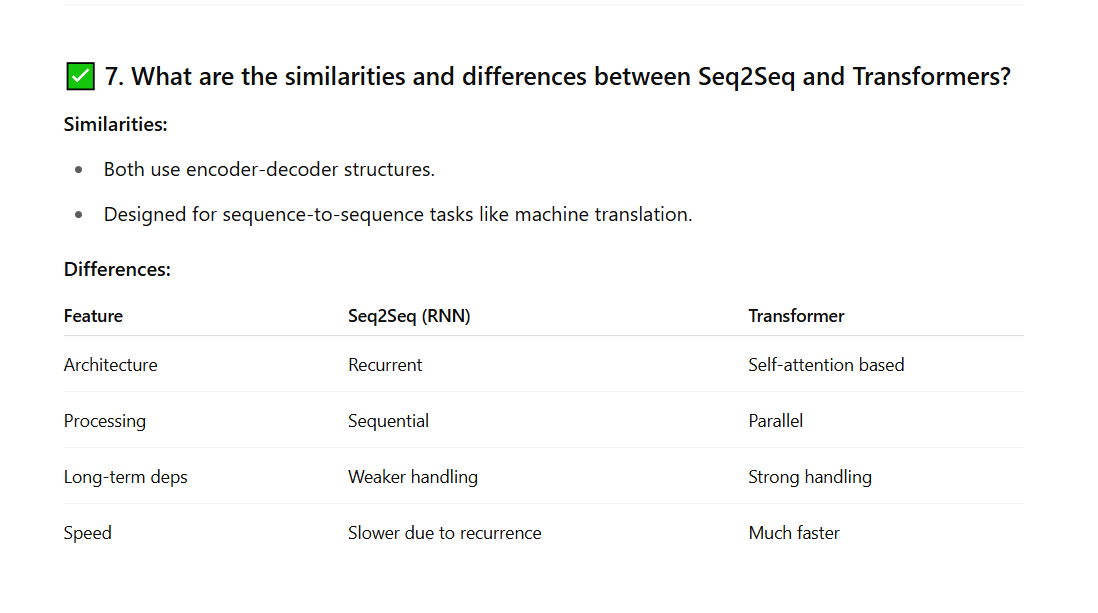

In [ ]:
df_filtered = df.loc[:, ~df.isin(["Remove"]).any(axis=0)]